## Работа с регулярными выражениями

In [52]:
import re 

def validate_email(email):
    pattern = r'[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]'

    if re.match(pattern, email):
        return True

    else:
        return False

email1 = "artem@golubnichij.ru"
email2 = "artem__golubnichij.ru"
email3 = "!rtem@golubnichij.ru"
email4 = "art em@golubnichij.ru"
email5 = "art234234em@golubnichij.ru"


print(validate_email(email1))
print(validate_email(email2))
print(validate_email(email3))
print(validate_email(email4))
print(validate_email(email5))


True
False
False
False
True


In [53]:
def validate_fio(fio):
    pattern = r'^[А-Я][а-я]+\s[А-Я][а-я]+\s[А-Я][а-я]+$'
    #pattern=r'[А-ЯЁ][а-яё]+\s+[А-ЯЁ][а-яё]+(?:\s+[А-ЯЁ][а-яё]+)'
    if re.match(pattern, fio):
        return True

    else:
        return False

text1 = "Иванов Иван Иванович"
print(validate_fio(text1))


True


In [54]:
def validate_pw(pw):
    #pattern = r'[A-Za-z0-9._%]{8,}'
    pattern = r'^[a-zA-Z0-9]{8,}'
    if re.match(pattern, pw):
        return True

    else:
        return False

pw1 = "passwor?:*%183613)"
print(validate_pw(pw1))

False


In [55]:
def validate_phone(phone):
    pattern = r'^\+7 \(\d{3}\) \d{3}-\d{2}-\d{2}$'
    #pattern = r'^8-\d{3}-\d{3}-\d{2}-\d{2}$'
    if re.match(pattern, phone):
        return True

    else:
        return False

phone1 = "+7 (999) 999-99-99"
print(validate_phone(phone1))

True


## Кейс обработка текста

### Подключение библиотек и загрузка данных

In [56]:
import numpy as np
import pandas as pd
import re
import nltk
import string

pd.options.mode.chained_assignment = None

full_df = pd.read_csv("tweet_small.csv")

### Просмотр данных

In [57]:
df = full_df[["text"]]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    93 non-null     object
dtypes: object(1)
memory usage: 876.0+ bytes


In [58]:
print(df)

                                                 text
0   @AppleSupport causing the reply to be disregar...
1   @105835 Your business means a lot to us. Pleas...
2   @76328 I really hope you all change but I'm su...
3   @105836 LiveChat is online at the moment - htt...
4   @VirginTrains see attached error message. I've...
..                                                ...
88  @105860 I wish Amazon had an option of where I...
89  They reschedule my shit for tomorrow https://t...
90  @105861 Hey Sara, sorry to hear of the issues ...
91  @Tesco bit of both - finding the layout cumber...
92  @105861 If that doesn't help please DM your fu...

[93 rows x 1 columns]


### Перевод к нижнему регистру

In [59]:
df["text_lower"] = df["text"].str.lower()
df.head()

,text,text_lower
0,@AppleSupport causing the reply to be disregar...,@applesupport causing the reply to be disregar...
1,@105835 Your business means a lot to us. Pleas...,@105835 your business means a lot to us. pleas...
2,@76328 I really hope you all change but I'm su...,@76328 i really hope you all change but i'm su...
3,@105836 LiveChat is online at the moment - htt...,@105836 livechat is online at the moment - htt...
4,@VirginTrains see attached error message. I've...,@virgintrains see attached error message. i've...


### Удаление пунктуации

In [60]:
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("", "", PUNCT_TO_REMOVE))

df["text_wo_punct"] = df["text_lower"].apply(remove_punctuation)
df.head()


,text,text_lower,text_wo_punct
0,@AppleSupport causing the reply to be disregar...,@applesupport causing the reply to be disregar...,applesupport causing the reply to be disregard...
1,@105835 Your business means a lot to us. Pleas...,@105835 your business means a lot to us. pleas...,105835 your business means a lot to us please ...
2,@76328 I really hope you all change but I'm su...,@76328 i really hope you all change but i'm su...,76328 i really hope you all change but im sure...
3,@105836 LiveChat is online at the moment - htt...,@105836 livechat is online at the moment - htt...,105836 livechat is online at the moment https...
4,@VirginTrains see attached error message. I've...,@virgintrains see attached error message. i've...,virgintrains see attached error message ive tr...


### Удаление стоп-слов

In [61]:
from nltk.corpus import stopwords
nltk.download("stopwords")
", ".join(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/artemgolubnichiy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [62]:
STOPWORDS = set(stopwords.words("english"))
def remove_stopwords(text):
    return " ".join([word for word in str(text).split(" ") if word not in STOPWORDS])

df["text_wo_stop"] = df["text_wo_punct"].apply(remove_stopwords)
df.head()

,text,text_lower,text_wo_punct,text_wo_stop
0,@AppleSupport causing the reply to be disregar...,@applesupport causing the reply to be disregar...,applesupport causing the reply to be disregard...,applesupport causing reply disregarded tapped ...
1,@105835 Your business means a lot to us. Pleas...,@105835 your business means a lot to us. pleas...,105835 your business means a lot to us please ...,105835 business means lot us please dm name zi...
2,@76328 I really hope you all change but I'm su...,@76328 i really hope you all change but i'm su...,76328 i really hope you all change but im sure...,76328 really hope change im sure wont dont
3,@105836 LiveChat is online at the moment - htt...,@105836 livechat is online at the moment - htt...,105836 livechat is online at the moment https...,105836 livechat online moment httpstcosy94vtu...
4,@VirginTrains see attached error message. I've...,@virgintrains see attached error message. i've...,virgintrains see attached error message ive tr...,virgintrains see attached error message ive tr...


### Удаление частых слов

In [63]:
from collections import Counter
cnt = Counter()
for text in df["text_wo_stop"].values:
    for word in text.split():
        cnt[word] += 1

cnt.most_common(10)

[('us', 25),
 ('dm', 19),
 ('help', 18),
 ('thanks', 13),
 ('httpstcogdrqu22ypt', 12),
 ('applesupport', 11),
 ('please', 11),
 ('phone', 9),
 ('hi', 9),
 ('ive', 8)]

In [64]:
FREQWORDS = set([w for (w,ws) in cnt.most_common(10)])

def remove_freqwords(text):
    return " ".join([word for word in str(text).split(" ") if word not in FREQWORDS])

df["text_wo_stop_freq"] = df["text_wo_stop"].apply(remove_freqwords)
df.head()


,text,text_lower,text_wo_punct,text_wo_stop,text_wo_stop_freq
0,@AppleSupport causing the reply to be disregar...,@applesupport causing the reply to be disregar...,applesupport causing the reply to be disregard...,applesupport causing reply disregarded tapped ...,causing reply disregarded tapped notification ...
1,@105835 Your business means a lot to us. Pleas...,@105835 your business means a lot to us. pleas...,105835 your business means a lot to us please ...,105835 business means lot us please dm name zi...,105835 business means lot name zip code additi...
2,@76328 I really hope you all change but I'm su...,@76328 i really hope you all change but i'm su...,76328 i really hope you all change but im sure...,76328 really hope change im sure wont dont,76328 really hope change im sure wont dont
3,@105836 LiveChat is online at the moment - htt...,@105836 livechat is online at the moment - htt...,105836 livechat is online at the moment https...,105836 livechat online moment httpstcosy94vtu...,105836 livechat online moment httpstcosy94vtu...
4,@VirginTrains see attached error message. I've...,@virgintrains see attached error message. i've...,virgintrains see attached error message ive tr...,virgintrains see attached error message ive tr...,virgintrains see attached error message tried ...


### Удаление лишних столбцов

In [65]:
df.drop(["text_wo_punct", "text_wo_stop"], axis=1, inplace=True)

### Удаление редких слов

In [66]:
n_rare_words = 10
RAREWORDS = set([w for (w,ws) in cnt.most_common()[:-n_rare_words-1:-1]])
RAREWORDS

{'browser',
 'green',
 'httpstco9281okeebk',
 'including',
 'keen',
 'lee',
 'line',
 'log',
 'slowdown',
 'thin'}

In [67]:
def remove_rarewords(text):
    return " ".join([word for word in str(text).split(" ") if word not in RAREWORDS])

df["text_wo_stop_freq_rare"] = df["text_wo_stop_freq"].apply(remove_rarewords)
df.head()

,text,text_lower,text_wo_stop_freq,text_wo_stop_freq_rare
0,@AppleSupport causing the reply to be disregar...,@applesupport causing the reply to be disregar...,causing reply disregarded tapped notification ...,causing reply disregarded tapped notification ...
1,@105835 Your business means a lot to us. Pleas...,@105835 your business means a lot to us. pleas...,105835 business means lot name zip code additi...,105835 business means lot name zip code additi...
2,@76328 I really hope you all change but I'm su...,@76328 i really hope you all change but i'm su...,76328 really hope change im sure wont dont,76328 really hope change im sure wont dont
3,@105836 LiveChat is online at the moment - htt...,@105836 livechat is online at the moment - htt...,105836 livechat online moment httpstcosy94vtu...,105836 livechat online moment httpstcosy94vtu...
4,@VirginTrains see attached error message. I've...,@virgintrains see attached error message. i've...,virgintrains see attached error message tried ...,virgintrains see attached error message tried ...


### Стемминг

In [68]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

df["text_stemmed"] = df["text"].apply(stem_words)
df.head()

,text,text_lower,text_wo_stop_freq,text_wo_stop_freq_rare,text_stemmed
0,@AppleSupport causing the reply to be disregar...,@applesupport causing the reply to be disregar...,causing reply disregarded tapped notification ...,causing reply disregarded tapped notification ...,@applesupport caus the repli to be disregard a...
1,@105835 Your business means a lot to us. Pleas...,@105835 your business means a lot to us. pleas...,105835 business means lot name zip code additi...,105835 business means lot name zip code additi...,@105835 your busi mean a lot to us. pleas dm y...
2,@76328 I really hope you all change but I'm su...,@76328 i really hope you all change but i'm su...,76328 really hope change im sure wont dont,76328 really hope change im sure wont dont,@76328 i realli hope you all chang but i'm sur...
3,@105836 LiveChat is online at the moment - htt...,@105836 livechat is online at the moment - htt...,105836 livechat online moment httpstcosy94vtu...,105836 livechat online moment httpstcosy94vtu...,@105836 livechat is onlin at the moment - http...
4,@VirginTrains see attached error message. I've...,@virgintrains see attached error message. i've...,virgintrains see attached error message tried ...,virgintrains see attached error message tried ...,@virgintrain see attach error message. i'v tri...


In [69]:
df.drop(["text_wo_stop_freq", "text_wo_stop_freq_rare"], axis=1, inplace=True)

In [70]:
df.head()

,text,text_lower,text_stemmed
0,@AppleSupport causing the reply to be disregar...,@applesupport causing the reply to be disregar...,@applesupport caus the repli to be disregard a...
1,@105835 Your business means a lot to us. Pleas...,@105835 your business means a lot to us. pleas...,@105835 your busi mean a lot to us. pleas dm y...
2,@76328 I really hope you all change but I'm su...,@76328 i really hope you all change but i'm su...,@76328 i realli hope you all chang but i'm sur...
3,@105836 LiveChat is online at the moment - htt...,@105836 livechat is online at the moment - htt...,@105836 livechat is onlin at the moment - http...
4,@VirginTrains see attached error message. I've...,@virgintrains see attached error message. i've...,@virgintrain see attach error message. i'v tri...


### Пример стемминга

In [71]:
wrds = ["wait", "waiting", "waited", "waits", "Kuwait", "reply"]
for w in wrds:
    print(stemmer.stem(w))

wait
wait
wait
wait
kuwait
repli


### Обработка русского языка

In [72]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('russian')
wrds = ["Гуляла", 'reply']
for w in wrds:
    print(stemmer.stem(w))

гуля
reply


### Лемматизация

In [73]:
from nltk.stem import WordNetLemmatizer
nltk.download("wordnet")
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

df["text_lemmatized"] = df["text"].apply(lemmatize_words)
df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/artemgolubnichiy/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,text,text_lower,text_stemmed,text_lemmatized
0,@AppleSupport causing the reply to be disregar...,@applesupport causing the reply to be disregar...,@applesupport caus the repli to be disregard a...,@AppleSupport causing the reply to be disregar...
1,@105835 Your business means a lot to us. Pleas...,@105835 your business means a lot to us. pleas...,@105835 your busi mean a lot to us. pleas dm y...,@105835 Your business mean a lot to us. Please...
2,@76328 I really hope you all change but I'm su...,@76328 i really hope you all change but i'm su...,@76328 i realli hope you all chang but i'm sur...,@76328 I really hope you all change but I'm su...
3,@105836 LiveChat is online at the moment - htt...,@105836 livechat is online at the moment - htt...,@105836 livechat is onlin at the moment - http...,@105836 LiveChat is online at the moment - htt...
4,@VirginTrains see attached error message. I've...,@virgintrains see attached error message. i've...,@virgintrain see attach error message. i'v tri...,@VirginTrains see attached error message. I've...


## Анализ тональности текстов

### Загрузка данных и пакетов

In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Corona_NLP_train.csv", encoding="latin-1")
print(df.head())

   UserName  ScreenName   Location     TweetAt  \
0      3799       48751     London  16-03-2020   
1      3800       48752         UK  16-03-2020   
2      3801       48753  Vagabonds  16-03-2020   
3      3802       48754        NaN  16-03-2020   
4      3803       48755        NaN  16-03-2020   

                                       OriginalTweet           Sentiment  
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral  
1  advice Talk to your neighbours family to excha...            Positive  
2  Coronavirus Australia: Woolworths to give elde...            Positive  
3  My food stock is not the only one which is emp...            Positive  
4  Me, ready to go at supermarket during the #COV...  Extremely Negative  


In [75]:
print(df.shape)

(41157, 6)


### Вывод случайных значений и обзор датафрейма

In [76]:
df.sample(10)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
22244,26043,70995,Milky Way,25-03-2020,T\r\r\nThey can collect your DNA and do whatev...,Negative
15590,19389,64341,"London, England",22-03-2020,The current approach by the big three food ret...,Extremely Negative
5666,9465,54417,Metro Detroit,19-03-2020,As of this morning U S consumer confidence is ...,Positive
749,4548,49500,NaN,17-03-2020,"The supermarket food treatment covid-19, as lo...",Negative
31810,35609,80561,NaN,07-04-2020,prices fell Tuesday as traders were skeptical ...,Extremely Negative
35633,39432,84384,Withdean Stadium,09-04-2020,@SouthernRailUK Sound advice! ????\r\r\n#StayH...,Negative
40786,44585,89537,NaN,13-04-2020,New York has zero tolerance for price gouging ...,Positive
33632,37431,82383,"Davao City, Davao Region",08-04-2020,Alberta Premier Jason Kenney says the combined...,Negative
27828,31627,76579,"Valdosta, GA",03-04-2020,VALDOSTA Â When Sherry Brown tried ordering a...,Neutral
20325,24124,69076,Tri Cities Wa,24-03-2020,@business Still many more to go on the site.. ...,Neutral


In [77]:
df.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [78]:
df.duplicated().sum()

0

In [79]:
df = df[["OriginalTweet", "Sentiment"]]
df.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


### Визуализация

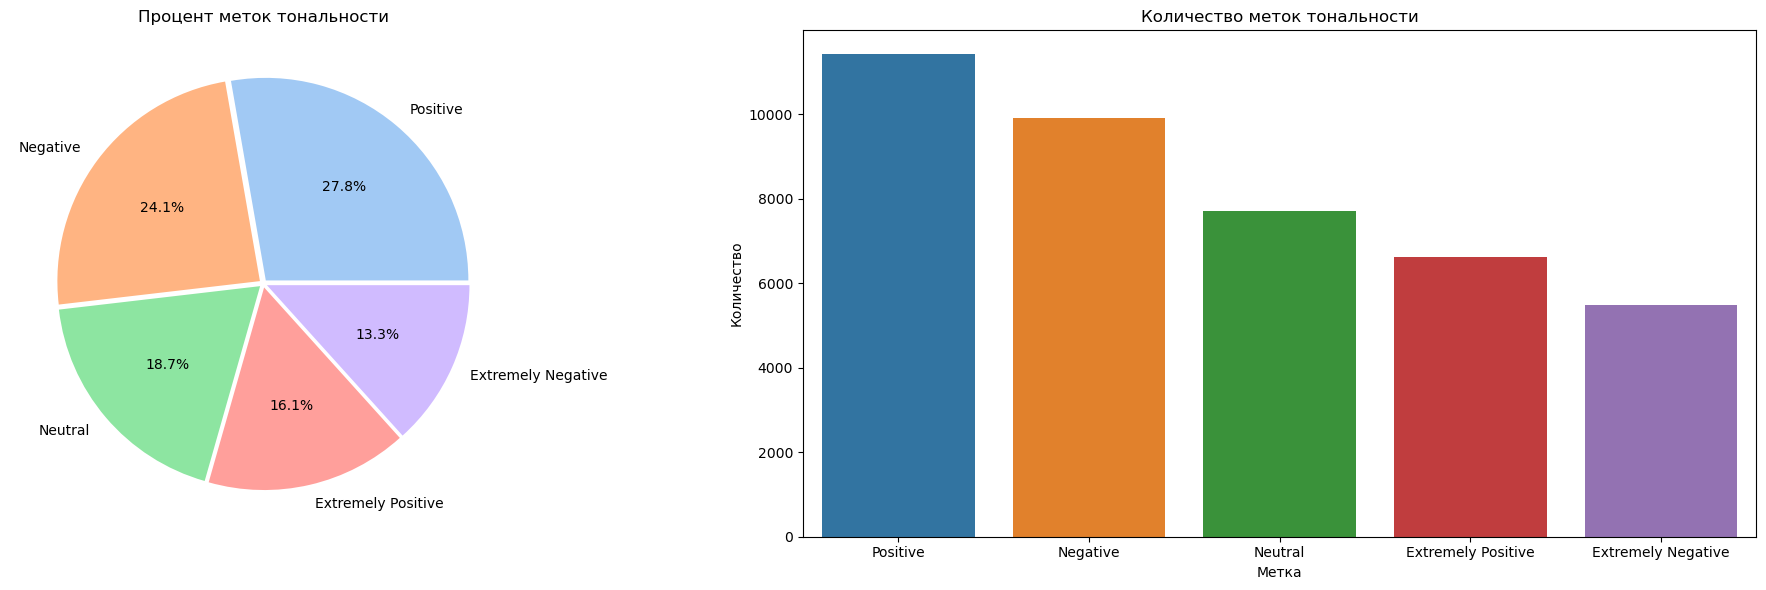

In [80]:
label_count = df["Sentiment"].value_counts()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
color = sns.color_palette(palette="pastel")
explode = [0.02]*len(label_count)

axes[0].pie(label_count.values, labels=label_count.index, autopct="%1.1f%%", colors = color, explode=explode)
axes[0].set_title("Процент меток тональности")

sns.barplot(x=label_count.index, y = label_count.values, ax=axes[1])
axes[1].set_title("Количество меток тональности")
axes[1].set_xlabel("Метка")
axes[1].set_ylabel("Количество")

plt.tight_layout()
plt.show()

### Подсчет длины сообщений

<Axes: xlabel='len', ylabel='Density'>

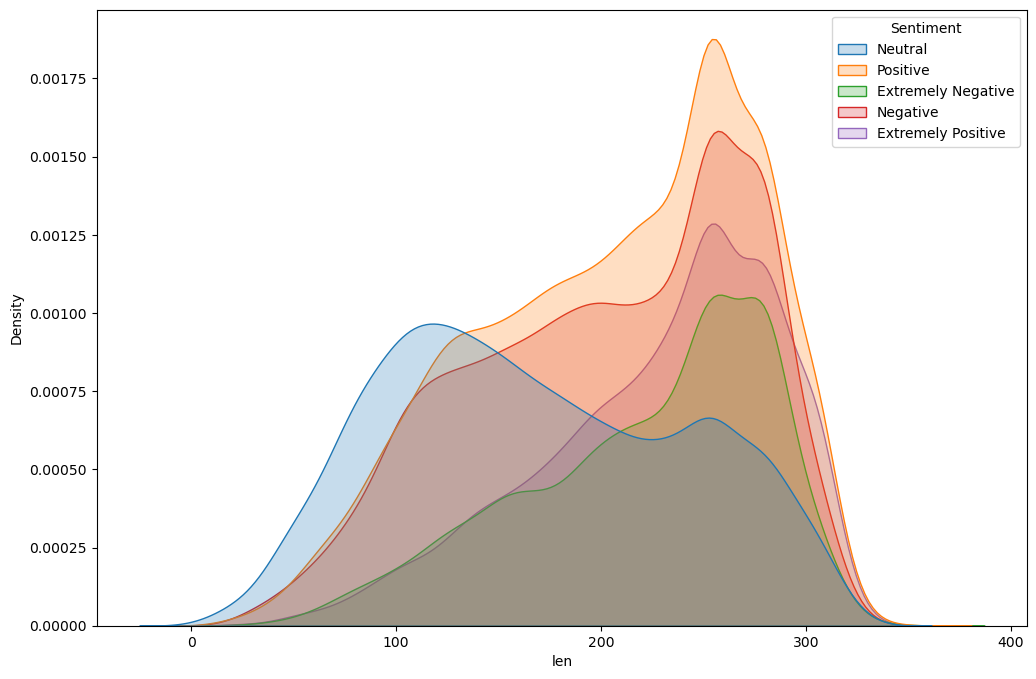

In [81]:
df["len"] = df["OriginalTweet"].apply(len)

plt.figure(figsize=(12,8))
sns.kdeplot(df, x = df["len"], fill=True, hue="Sentiment")

### BoW, Bag of Words, Мешок слов

In [82]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
matrix = cv.fit_transform(df["OriginalTweet"])

In [83]:
matrix.toarray()[:10, :5]

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

In [84]:
cv.get_feature_names_out()[:20]

array(['00', '000', '0000', '0000009375', '0000hrs', '000162', '00042',
       '000cr', '000francs', '000ksh', '000pcs', '000s', '000th', '000â',
       '0010', '0016', '0025450557', '0026691661', '005', '006'],
      dtype=object)

In [85]:
word_matrix = pd.DataFrame(matrix.toarray(), columns=cv.get_feature_names_out())

In [86]:
print(word_matrix)

       00  000  0000  0000009375  0000hrs  000162  00042  000cr  000francs  \
0       0    0     0           0        0       0      0      0          0   
1       0    0     0           0        0       0      0      0          0   
2       0    0     0           0        0       0      0      0          0   
3       0    0     0           0        0       0      0      0          0   
4       0    0     0           0        0       0      0      0          0   
...    ..  ...   ...         ...      ...     ...    ...    ...        ...   
41152   0    0     0           0        0       0      0      0          0   
41153   0    0     0           0        0       0      0      0          0   
41154   0    0     0           0        0       0      0      0          0   
41155   0    0     0           0        0       0      0      0          0   
41156   2    0     0           0        0       0      0      0          0   

       000ksh  ...  zzxwzxhc2v  zzz  zzzz  zâ  zã  zã¼rich  â² 

### Часто встречающиеся слова

In [87]:
df_sum = word_matrix.sum(axis=0, skipna=True)
bow = df_sum.sort_values(ascending=False)[:30]
bow = pd.DataFrame(bow, columns=["Frequncy"])

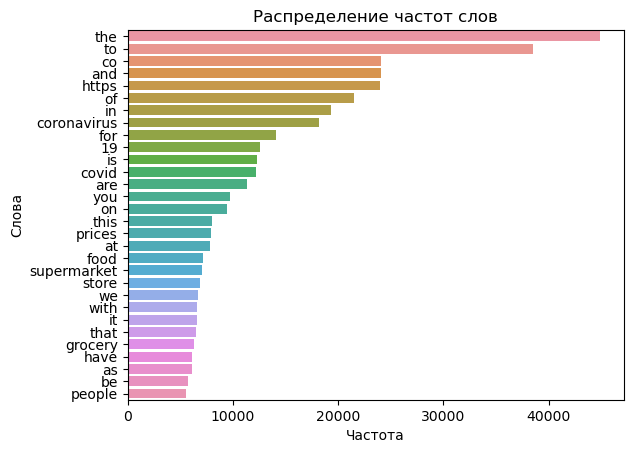

In [88]:
sns.barplot(x=bow["Frequncy"], y=bow.index)
plt.xlabel("Частота")
plt.ylabel("Слова")
plt.title("Распределение частот слов")
plt.show()

### Слова по оценкке тональности

In [89]:
import matplotlib.pyplot as plt
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize

In [90]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/artemgolubnichiy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Визуальная оценка частоты встречаемости

In [91]:
def create_freq_dist_plot(text):
    text = df[df["Sentiment"] == text]
    word_text = " ".join(txt for txt in text["OriginalTweet"])

    tokens = word_tokenize(word_text)

    freq_dist = FreqDist(tokens)

    word_plot = freq_dist.plot(50, cumulative=False, linewidth = 0.8, marker="o", color = "red")

    plt.show()

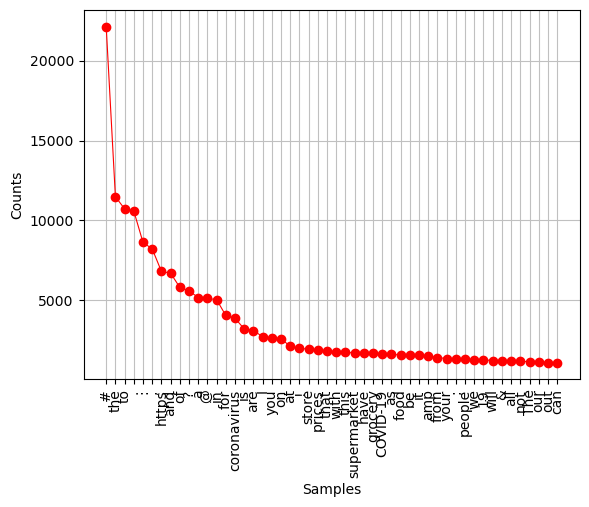

In [92]:
create_freq_dist_plot("Positive")

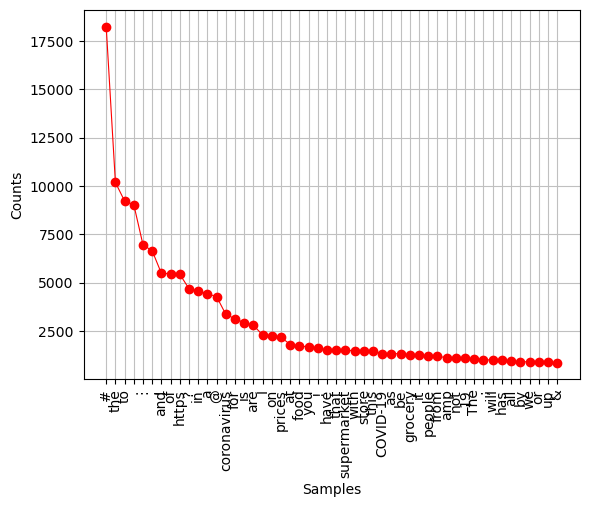

In [93]:
create_freq_dist_plot("Negative")

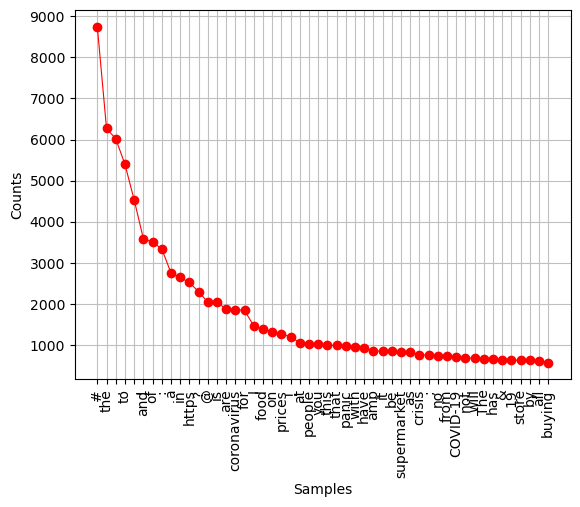

In [94]:
create_freq_dist_plot("Extremely Negative")

### Очистка данных

In [99]:
import string
import nltk
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r"@\S+", "", text)
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"pic.\S+", "", text)
    text = re.sub(r"[^a-z'A-Z]", " ", text)
    text = re.sub(r"\s+ [^a-z'A-Z]\s+", " ", text+ " ")
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.tokenize.word_tokenize(text)
    stopwords = nltk.corpus.stopwords.words("english")
    text = " ".join([i for i in words if i not in stopwords and len(i) > 2])
    text = re.sub("\s[\s]+", " ", text).strip()
    return text


In [100]:
df["new_text"] = df["OriginalTweet"].apply(clean_text)

In [101]:
df["OriginalTweet"].iloc[150]

'How come #TrumpIsAnIdiot or #trumpneedstoshutup is not trending?? For real!! People are freaked, stores canÂ\x92t keep food on their shelf, and the stock market is out of control. @realDonaldTrump please for the sake of the county shut up. #coronavirus'

In [103]:
df["new_text"].iloc[150]

'come trumpisanidiot trumpneedstoshutup trending real people freaked stores keep food shelf stock market control please sake county shut coronavirus'

### Стемминг

In [104]:
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

ps = PorterStemmer()
words = word_tokenize(df["new_text"].iloc[1])
for w in words:
    print(w, ":", ps.stem(w))

advice : advic
talk : talk
neighbours : neighbour
family : famili
exchange : exchang
phone : phone
numbers : number
create : creat
contact : contact
list : list
phone : phone
numbers : number
neighbours : neighbour
schools : school
employer : employ
chemist : chemist
set : set
online : onlin
shopping : shop
accounts : account
poss : poss
adequate : adequ
supplies : suppli
regular : regular
meds : med
order : order


In [105]:
stemmed = []
for i in range(len(df)):
    stem_list = []
    words = word_tokenize(df["new_text"].iloc[i])
    for w in words:
        stem_list.append(ps.stem(w))
    stemmed.append(stem_list)

df["Stemmed"] = stemmed
df.head()

,OriginalTweet,Sentiment,len,new_text,Stemmed
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,111,,[]
1,advice Talk to your neighbours family to excha...,Positive,237,advice talk neighbours family exchange phone n...,"[advic, talk, neighbour, famili, exchang, phon..."
2,Coronavirus Australia: Woolworths to give elde...,Positive,131,coronavirus australia woolworths give elderly ...,"[coronaviru, australia, woolworth, give, elder..."
3,My food stock is not the only one which is emp...,Positive,306,food stock one empty please dont panic enough ...,"[food, stock, one, empti, pleas, dont, panic, ..."
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,310,ready supermarket covid outbreak paranoid food...,"[readi, supermarket, covid, outbreak, paranoid..."


In [106]:
df["Stemmed"] = df["Stemmed"].apply(" ".join)
df.head()

,OriginalTweet,Sentiment,len,new_text,Stemmed
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,111,,
1,advice Talk to your neighbours family to excha...,Positive,237,advice talk neighbours family exchange phone n...,advic talk neighbour famili exchang phone numb...
2,Coronavirus Australia: Woolworths to give elde...,Positive,131,coronavirus australia woolworths give elderly ...,coronaviru australia woolworth give elderli di...
3,My food stock is not the only one which is emp...,Positive,306,food stock one empty please dont panic enough ...,food stock one empti pleas dont panic enough f...
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,310,ready supermarket covid outbreak paranoid food...,readi supermarket covid outbreak paranoid food...


## Классификация

### Наивный Байес

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

X = df["Stemmed"]
y, class_names = pd.factorize(df["Sentiment"], sort=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024, stratify=y)

pipe_1 = Pipeline([("vectorizer", TfidfVectorizer()), ("classifire", MultinomialNB(alpha=0.005))])

pipe_1.fit(X_train, y_train)

y_pred = pipe_1.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=class_names))

0.429421768707483
                    precision    recall  f1-score   support

Extremely Negative       0.49      0.32      0.38      1096
Extremely Positive       0.50      0.31      0.39      1325
          Negative       0.40      0.48      0.43      1983
           Neutral       0.55      0.34      0.42      1543
          Positive       0.39      0.56      0.46      2285

          accuracy                           0.43      8232
         macro avg       0.46      0.40      0.42      8232
      weighted avg       0.45      0.43      0.42      8232



### Логистическая регрессия

In [109]:
from sklearn.linear_model import LogisticRegression
pipe_2 = Pipeline([("vectorizer", TfidfVectorizer()), ("classifire", LogisticRegression())])

pipe_2.fit(X_train, y_train)

y_pred = pipe_2.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=class_names))

0.5832118561710399
                    precision    recall  f1-score   support

Extremely Negative       0.65      0.48      0.55      1096
Extremely Positive       0.69      0.56      0.62      1325
          Negative       0.53      0.55      0.54      1983
           Neutral       0.63      0.67      0.65      1543
          Positive       0.53      0.61      0.57      2285

          accuracy                           0.58      8232
         macro avg       0.61      0.58      0.59      8232
      weighted avg       0.59      0.58      0.58      8232



/Library/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
